In [29]:
# # Check for working notebook
print('Im Working')

Im Working


Reading corpus, english stopwords and punctuation.

In [30]:
# NLTK imports
import nltk
from nltk.corpus import webtext
from nltk.corpus import state_union
import numpy as np
nltk.download('state_union')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

print("\n\n")
print('The fields are: ')
print(state_union.fileids())

[nltk_data] Downloading package state_union to
[nltk_data]     C:\Users\Panagiotis\AppData\Roaming\nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Panagiotis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Panagiotis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Panagiotis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



The fields are: 
[u'1945-Truman.txt', u'1946-Truman.txt', u'1947-Truman.txt', u'1948-Truman.txt', u'1949-Truman.txt', u'1950-Truman.txt', u'1951-Truman.txt', u'1953-Eisenhower.txt', u'1954-Eisenhower.txt', u'1955-Eisenhower.txt', u'1956-Eisenhower.txt', u'1957-Eisenhower.txt', u'1958-Eisenhower.txt', u'1959-Eisenhower.txt', u'1960-Eisenhower.t

Tokenizing, cleaning and POS tagging the words in the text.

In [39]:
# Tokenization & POS tagging
from nltk import word_tokenize
from nltk.corpus import stopwords 

# Set up the text to tokenize
bushUnion = state_union.raw('2005-GWBush.txt')  

# Define tokenization of the words
words = word_tokenize(bushUnion)

# Set-up remove of stop words
stop_words = set(stopwords.words('english')) 

# Cleanup of the words
cleanedWords = []
for word in words:
    # Not commas periods and applause.
    if word.lower() not in [
            ",",
            ".",
            "``",
            "''",
            ";",
            "?",
            "--",
            ")",
            "(",
            ":",
            "!",
            "applause"
        ] and len(word) > 4 and word not in stop_words:
            cleanedWords.append(word.lower())
# apply POS tagging to the words
pos_tagged_words = nltk.pos_tag(cleanedWords)
print(pos_tagged_words)

False
[(u'president', 'NN'), (u'george', 'NN'), (u'address', 'NN'), (u'before', 'IN'), (u'joint', 'JJ'), (u'session', 'NN'), (u'congress', 'NN'), (u'state', 'NN'), (u'union', 'NN'), (u'february', 'JJ'), (u'president', 'NN'), (u'speaker', 'NN'), (u'president', 'NN'), (u'cheney', 'NN'), (u'members', 'NNS'), (u'congress', 'VBP'), (u'fellow', 'JJ'), (u'citizens', 'NNS'), (u'congress', 'NN'), (u'gathers', 'NNS'), (u'elected', 'VBN'), (u'branches', 'NNS'), (u'government', 'NN'), (u'share', 'NN'), (u'great', 'JJ'), (u'privilege', 'NN'), (u'placed', 'VBN'), (u'office', 'NN'), (u'votes', 'NNS'), (u'people', 'NNS'), (u'serve', 'VBP'), (u'tonight', 'JJ'), (u'privilege', 'NN'), (u'share', 'NN'), (u'newly-elected', 'JJ'), (u'leaders', 'NNS'), (u'afghanistan', 'VBP'), (u'palestinian', 'JJ'), (u'territories', 'NNS'), (u'ukraine', 'VBP'), (u'sovereign', 'JJ'), (u'weeks', 'NNS'), (u'stood', 'VBD'), (u'steps', 'NNS'), (u'capitol', 'NN'), (u'renewed', 'VBN'), (u'commitment', 'JJ'), (u'nation', 'NN'), (u'

Lemmatization of the text.

The most common stemmed words are: 
(u'security', 29)
(u'freedom', 21)
(u'america', 20)
(u'country', 19)
(u'social', 18)
(u'government', 18)
(u'people', 18)
(u'american', 16)
(u'nation', 16)
(u'congress', 16)


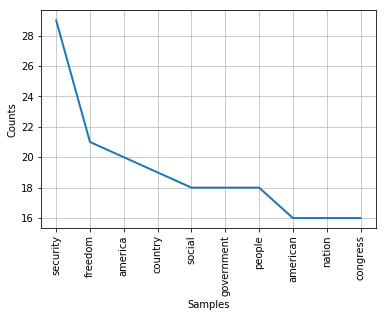

In [40]:
# Lemmatisation
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# returning POS tags that are recognisable by lemmatizer 
def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''

# Initializing lemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Lemmatizing words
lemmatized_words = []

for pre_lem in pos_tagged_words:
    pos = get_wordnet_pos(pre_lem[1])
    if pos!="":
        lemmed = wordnet_lemmatizer.lemmatize(pre_lem[0], pos)
    else:
        lemmed = wordnet_lemmatizer.lemmatize(pre_lem[0])
    lemmatized_words.append(lemmed)

lemmedFrequencies = nltk.FreqDist(lemmatized_words)
print('The most common stemmed words are: ')
for e in lemmedFrequencies.most_common(10):
    print (e)
lemmedFrequencies.plot(10)